# Proyek Analisis Data: [Bike Sharing dataset]
- **Nama:** [Adedio Daniel Situmeang]
- **Email:** [adediodaniel9@gmail.com]
- **ID Dicoding:** [Adedio Daniel S]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
  **Bagaimana tren penggunaan sepeda oleh penyewa terdaftar dan penyewa kasual selama periode waktu tertentu?**
- Pertanyaan 2
  **Faktor cuaca dan suhu mana yang berpengaruh terhadap jumlah total penyewa sepeda dan Bagaimana korelasi antara cuaca buruk dan penyewa sepeda?**

## Import Semua Packages/Library yang Digunakan

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [2]:
# Memuat data
data = pd.read_csv('day.csv')

# Mengonversi kolom 'dteday' menjadi format datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Menampilkan beberapa baris data
data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset terdiri dari 731 baris dan 14 kolom
- *dteday* menunjukkan tanggal peminjaman, *cnt* menunjukkan jumlah total, *casual* menunjukkan pengguna kasual, dan *registered* menunjukkan pengguna terdaftar...

### Assessing Data

In [4]:
# Mengecek missing value
print(data.isnull().sum())

# Mengecek informasi kolom
data.info()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 1

**Insight:**
- Tidak ada missing value pada dataset yang digunakan
- Semua kolom memiliki tipe data yang sama dengan jenis informasi yang disimpan

### Cleaning Data

In [6]:
# Tidak diperlukan cleaning yang ekstensif karena data sudah bersih.


**Insight:**
- Dataset sudah dalam posisi yang tepat dan bisa dilakukan analisis lebih lanjut

## Exploratory Data Analysis (EDA)




### Explore Pengaruh Cuaca dan hari terhadap Jumlah Penyewaan Sepeda

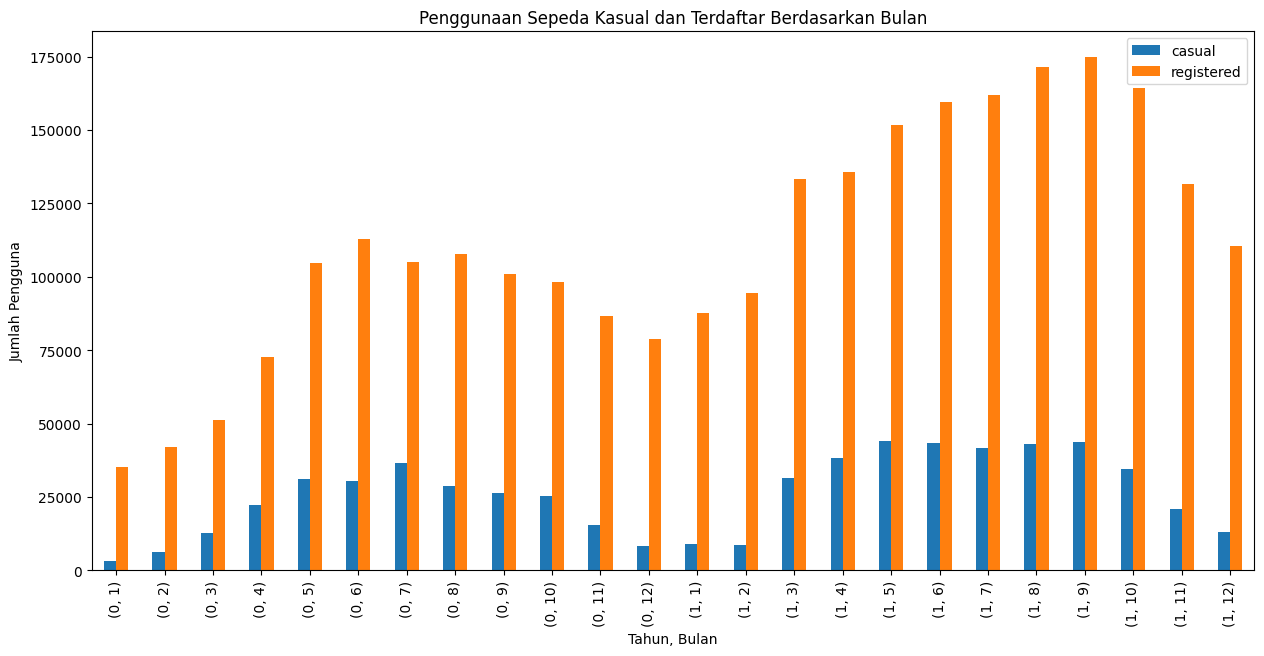

In [7]:
# Mengelompokkan dataset berdasarkan tahun dan bulan
data['month'] = data['dteday'].dt.month
data_grouped = data.groupby(['yr', 'month'])[['casual', 'registered']].sum()

# Membuat plot untuk melihat perbandingan pengguna
data_grouped.plot(kind='bar', figsize=(15, 7))
plt.title('Penggunaan Sepeda Kasual dan Terdaftar Berdasarkan Bulan')
plt.xlabel('Tahun, Bulan')
plt.ylabel('Jumlah Pengguna')
plt.show()


**Insight:**
- Pengguna kasual lebih aktif pada bulan tertentu seperti musim panas sedangkan penyewa terdaftar lebih stabil sepanjang tahun
- Puncak peminjaman sepeda terjadi pada pertengahan tahun

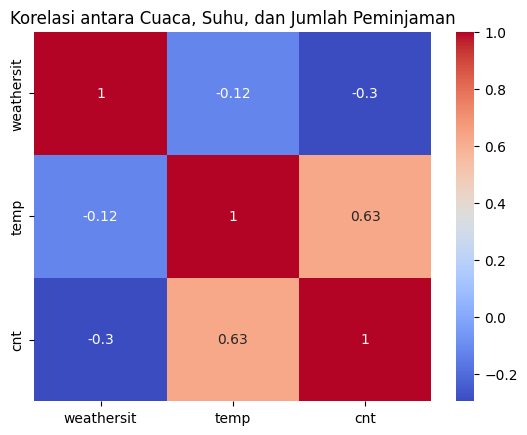

In [8]:
# Melihat hubungan antara variabel cuaca, suhu, dan jumlah peminjaman
correlation = data[['weathersit', 'temp', 'cnt']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Cuaca, Suhu, dan Jumlah Peminjaman')
plt.show()


**Insight:**
- Faktor suhu (*temp*) memiliki hubungan positif dengan jumlah peminjaman
- Cuaca buruk (*weathersit*) menunjukkan hubungan negatif dengan peminjaman sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda oleh penyewa terdaftar dan penyewa kasual selama periode waktu tertentu?

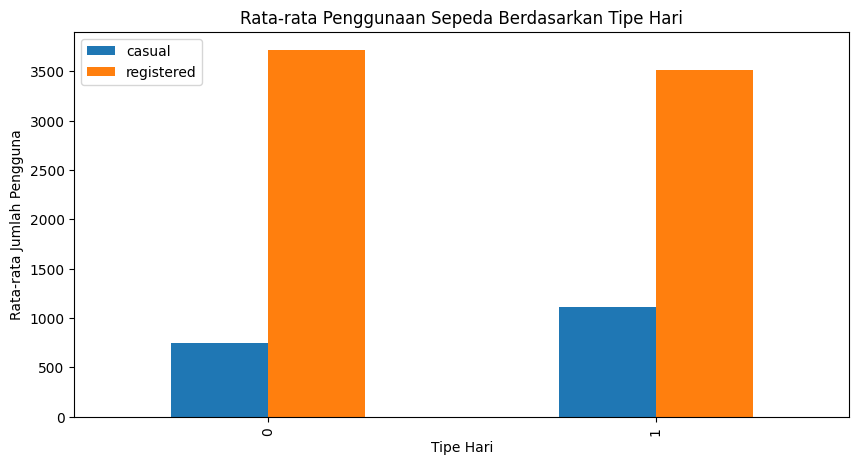

In [ ]:
# Menambah kolom 'day_type' untuk membedakan antara hari kerja dan akhir pekan
data['day_type'] = data['weekday'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')
day_type_grouped = data.groupby('day_type')[['casual', 'registered']].mean().reset_index()
day_type_grouped.plot(kind='bar', figsize=(10, 5))
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Tipe Hari')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.show()


### Pertanyaan 2: Faktor cuaca dan suhu mana yang berpengaruh terhadap jumlah total penyewa sepeda dan Bagaimana korelasi antara cuaca buruk dan penyewa sepeda?

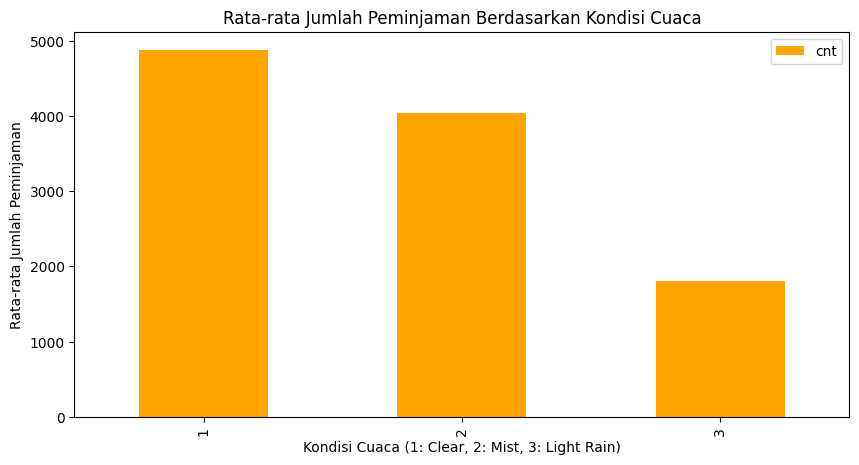

In [9]:
# Mengelompokkan data berdasarkan kondisi cuaca
weather_grouped = data.groupby(['weathersit'])[['cnt']].mean()
weather_grouped.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Rata-rata Jumlah Peminjaman Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1: Clear, 2: Mist, 3: Light Rain)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()


**Insight:**
- Cuaca buruk seperti hujan ringan (weathersit=3) mengurangi jumlah total peminjaman sepeda
- Pada kondisi cerah (weathersit=1), peminjaman cenderung lebih tinggi

## Analisis Lanjutan (Opsional)

<ipython-input-24-8adeec7621c2>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clustering_df, x='cnt_category', palette='viridis')  # hue parameter dihapus
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWar

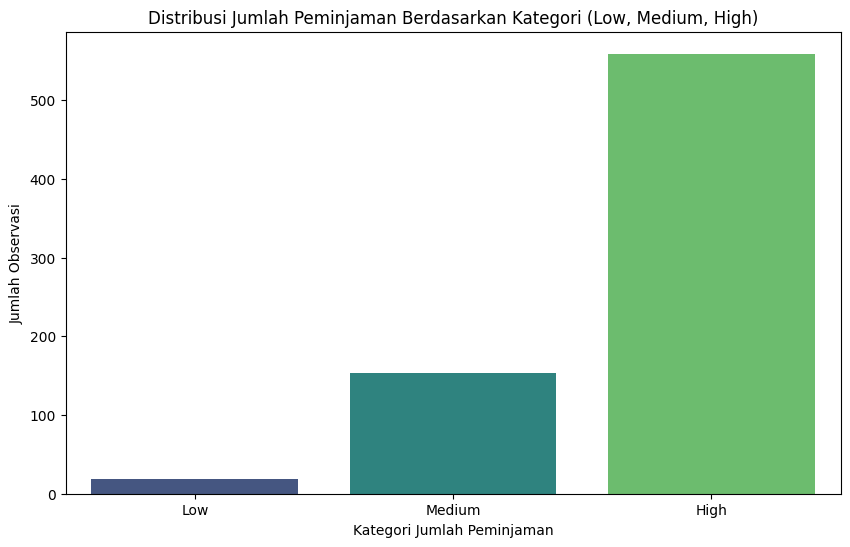

<ipython-input-24-8adeec7621c2>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clustering_df, x='temp_category', palette='coolwarm')  # hue parameter dihapus
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureW

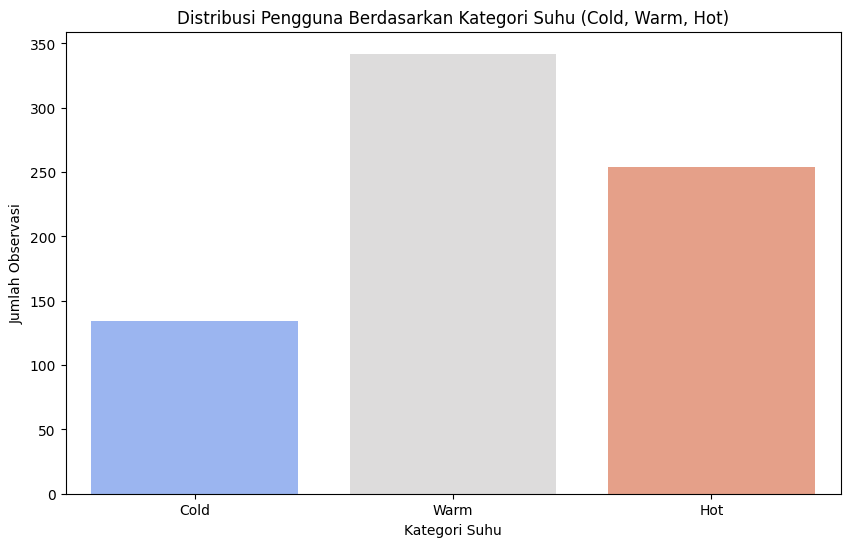

<ipython-input-24-8adeec7621c2>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clustering_df, x='weather_category', palette='magma')  # hue parameter dihapus
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureW

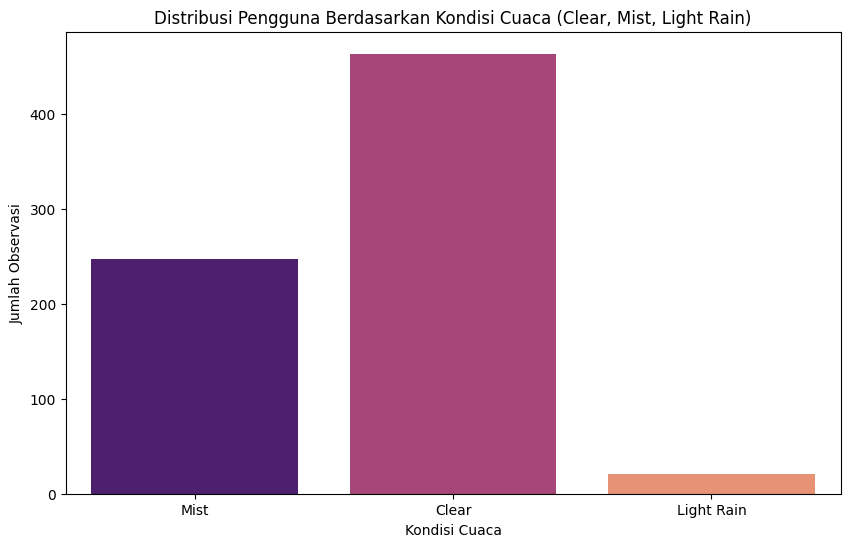

cnt_category  temp_category  weather_category
Low           Cold           Clear                 4
                             Light Rain            3
                             Mist                  4
              Warm           Light Rain            4
                             Mist                  3
Medium        Cold           Clear                48
                             Light Rain            2
                             Mist                 35
              Warm           Clear                25
                             Light Rain            9
                             Mist                 31
              Hot            Light Rain            1
                             Mist                  2
High          Cold           Clear                31
                             Mist                  7
              Warm           Clear               173
                             Light Rain            2
                             Mist                 95


In [24]:
# 1. Binning untuk Jumlah Peminjaman (cnt)
# Membuat kategori peminjaman: 'Low', 'Medium', 'High'
bins = [0, 1000, 3000, data['cnt'].max()]
labels = ['Low', 'Medium', 'High']
data['cnt_category'] = pd.cut(data['cnt'], bins=bins, labels=labels)

# 2. Binning untuk Suhu (temp)
# Membuat kategori suhu: 'Cold', 'Warm', 'Hot'
temp_bins = [data['temp'].min(), 0.3, 0.6, data['temp'].max()]
temp_labels = ['Cold', 'Warm', 'Hot']
data['temp_category'] = pd.cut(data['temp'], bins=temp_bins, labels=temp_labels)

# 3. Binning untuk Kondisi Cuaca (weathersit)
# Menyederhanakan kondisi cuaca: 1 = 'Clear', 2 = 'Mist', 3 = 'Light Rain'
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain'}
data['weather_category'] = data['weathersit'].map(weather_mapping)

# 4. Menggabungkan Hasil Kategori
# Membuat DataFrame baru dengan kategori-kategori yang telah dibentuk
clustering_df = data[['dteday', 'cnt', 'temp', 'weathersit', 'cnt_category', 'temp_category', 'weather_category']]

# 5. Visualisasi Hasil Clustering berdasarkan Kategori Jumlah Peminjaman (cnt)
plt.figure(figsize=(10, 6))
sns.countplot(data=clustering_df, x='cnt_category', palette='viridis')  # hue parameter dihapus
plt.title('Distribusi Jumlah Peminjaman Berdasarkan Kategori (Low, Medium, High)')
plt.xlabel('Kategori Jumlah Peminjaman')
plt.ylabel('Jumlah Observasi')
plt.show()

# 6. Visualisasi Berdasarkan Kategori Suhu (temp)
plt.figure(figsize=(10, 6))
sns.countplot(data=clustering_df, x='temp_category', palette='coolwarm')  # hue parameter dihapus
plt.title('Distribusi Pengguna Berdasarkan Kategori Suhu (Cold, Warm, Hot)')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Observasi')
plt.show()

# 7. Visualisasi Berdasarkan Kategori Cuaca
plt.figure(figsize=(10, 6))
sns.countplot(data=clustering_df, x='weather_category', palette='magma')  # hue parameter dihapus
plt.title('Distribusi Pengguna Berdasarkan Kondisi Cuaca (Clear, Mist, Light Rain)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Observasi')
plt.show()

# 8. Insight dari Clustering
print(clustering_df.groupby(['cnt_category', 'temp_category', 'weather_category'], observed=True).size())


**Insight**


- Mayoritas Peminjaman berada pada kategori High
- Pada suhu warm, peminjaman lebih banyak terjadi dibandingkan pada suhu cold yang jumlah peminjamannya rendah
- Pada kondisi cuaca clear, peminjaman lebih tinggi dibandingkan cuaca lainnya

## Conclusion

- Penyewa kasual cenderung lebih aktif pada akhir pekan dibandingkan hari kerja sedangkan penyewa terdaftar memiliki pola peminjaman yang stabil sepanjang minggu.
- Suhu yang lebih tinggi dan cuaca cerah meningkatkan jumlah peminjaman, sedangkan cuaca buruk akan mengurangi aktivitas peminjaman.